In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [5]:
df_train = pd.DataFrame()
df_train = pd.read_csv("D:\\AI PROJECT\\train_clean.csv")
df_train

,beds,baths,size,lot_size,zip_code,price
0,3,2.5,2590.0,6000.0,98144,795000.0
1,4,2.0,2240.0,13503.6,98106,915000.0
2,4,3.0,2040.0,3783.0,98107,950000.0
3,4,3.0,3800.0,5175.0,98199,1950000.0
4,2,2.0,1190.0,43560.0,98107,740000.0
...,...,...,...,...,...,...
1655,3,3.5,1680.0,1486.0,98126,675000.0
1656,2,2.0,1400.0,14810.4,98199,699950.0
1657,3,2.0,1370.0,21780.0,98112,910000.0
1658,4,2.0,2140.0,6250.0,98199,1150000.0


In [6]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

clf.fit_predict(df_train)

train_scores = clf.negative_outlier_factor_

np.sort(train_scores) [0:100]

threshold_value = -5
contrary_train = train_scores < threshold_value
np.count_nonzero(contrary_train)

df_new_train = df_train[train_scores > threshold_value].reset_index(drop=True)
df_new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      1652 non-null   int64  
 1   baths     1652 non-null   float64
 2   size      1652 non-null   float64
 3   lot_size  1652 non-null   float64
 4   zip_code  1652 non-null   int64  
 5   price     1652 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 77.6 KB


-----------------Feature: beds-----------------
Mean squared error: 334227452813.18
Variance score: 0.13


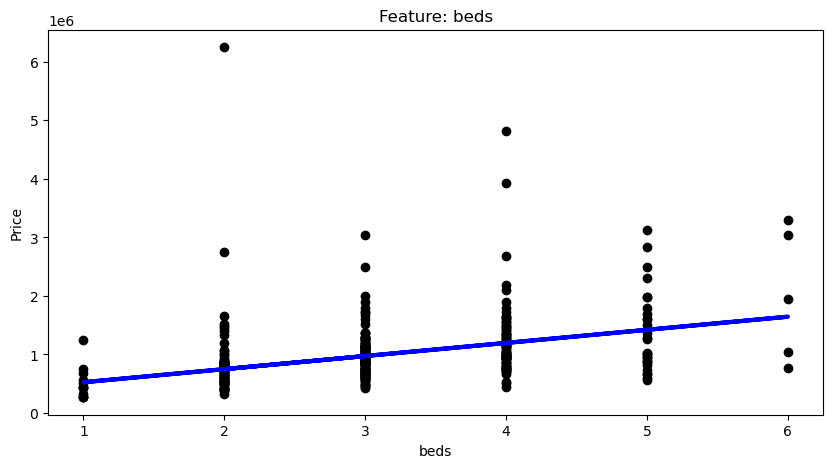

-----------------Feature: baths-----------------
Mean squared error: 287098189465.98
Variance score: 0.25


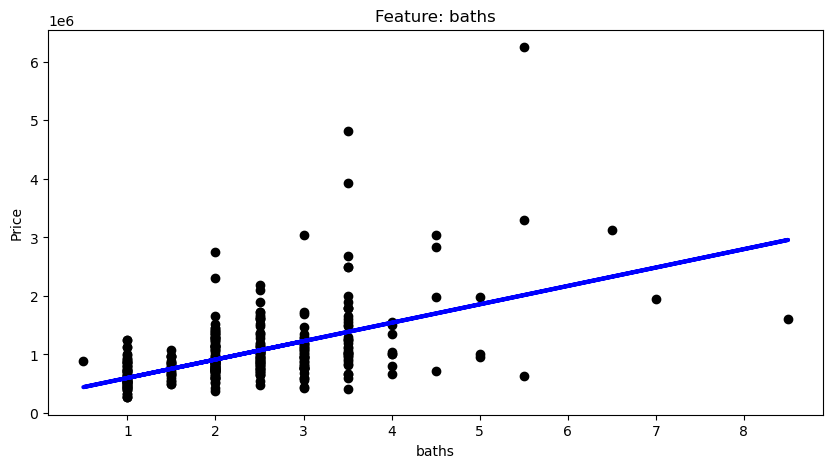

-----------------Feature: size-----------------
Mean squared error: 207494873599.35
Variance score: 0.46


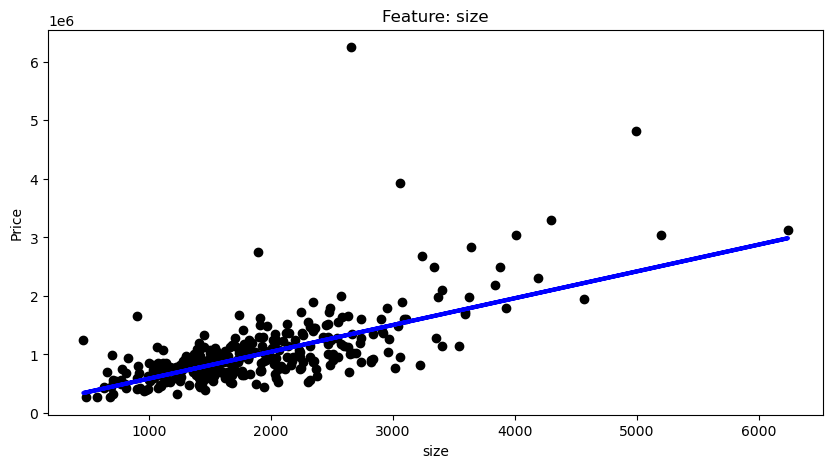

-----------------Feature: lot_size-----------------
Mean squared error: 383177613560.22
Variance score: -0.00


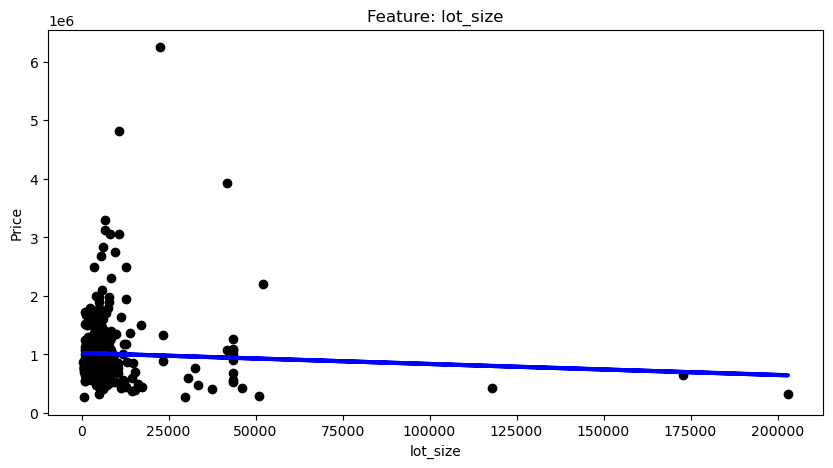

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Iterate over each feature except 'price' and 'zip_code' (assuming 'zip_code' is categorical)
features = df_new_train.columns.drop(['price', 'zip_code'])  # Assuming 'zip_code' is categorical
for feature in features:
    # Prepare data
    X = df_new_train[[feature]]
    y = df_new_train['price']
    
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create linear regression object
    regr = linear_model.LinearRegression()
    
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    
    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    # Print the feature being analyzed
    print(f"-----------------Feature: {feature}-----------------")
    
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    
    # Plot outputs
    plt.figure(figsize=(10, 5))
    plt.scatter(X_test, y_test, color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)
    plt.title(f"Feature: {feature}")
    plt.xlabel(f"{feature}")
    plt.ylabel("Price")
    plt.show()


In [9]:
# It seems I forgot to import the necessary library for linear_model. Let's correct that and calculate the R^2 score again.
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr_all_features = LinearRegression()

# Train the model using the training sets with all features
regr_all_features.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_all_features = regr_all_features.predict(X_test)

# Calculate the R^2 score
r2_score_all_features = r2_score(y_test, y_pred_all_features)

r2_score_all_features


-0.001702374401070239

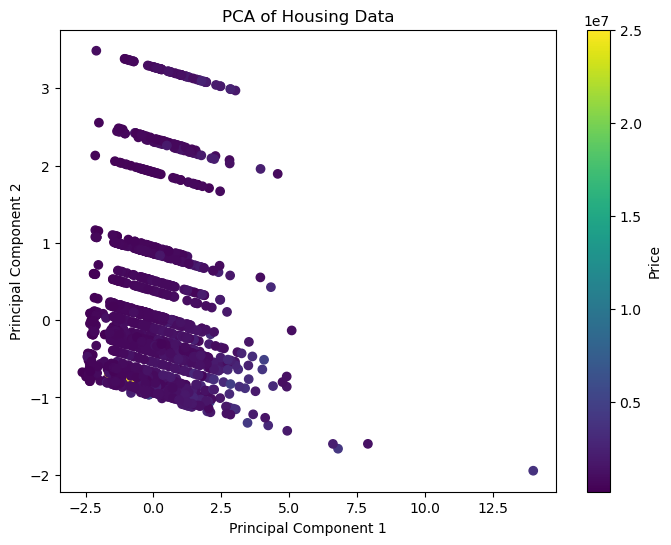

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with the 'beds', 'size', 'zip_code', and 'price'
features = ['beds', 'size', 'zip_code']
X = df_train[features]
y = df_train['price']

# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Price')
plt.title('PCA of Housing Data')
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Selecting features and target
features = ['size', 'beds', 'baths']
X = df_new_train[features]
y = df_new_train['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline that first standardizes the data then applies PCA
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))

# Fitting and transforming the features
X_train_pca = pca_pipeline.fit_transform(X_train)
X_test_pca = pca_pipeline.transform(X_test)

# Creating and training the linear regression model using the principal components
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculating the R^2 score
r2_score_pca = r2_score(y_test, y_pred)
r2_score_pca


0.3600123296821439

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Selecting features and target
features = ['size', 'beds', 'baths']
X = df_new_train[features]
y = df_new_train['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline that first standardizes the data then applies PCA
pca_pipeline = make_pipeline(StandardScaler(), PCA(n_components=2))

# Fitting and transforming the features
X_train_pca = pca_pipeline.fit_transform(X_train)
X_test_pca = pca_pipeline.transform(X_test)

# Creating and training the linear regression model using the principal components
model = LinearRegression()
model.fit(X_train_pca, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculating the R^2 score
r2_score_pca = r2_score(y_test, y_pred)
r2_score_pca


0.3600123296821439

In [15]:
# Plotting actual vs predicted prices based on previous setup
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_pca, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Using PCA)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.legend()
plt.show()


NameError: name 'y_pred_pca' is not defined

<Figure size 1000x600 with 0 Axes>

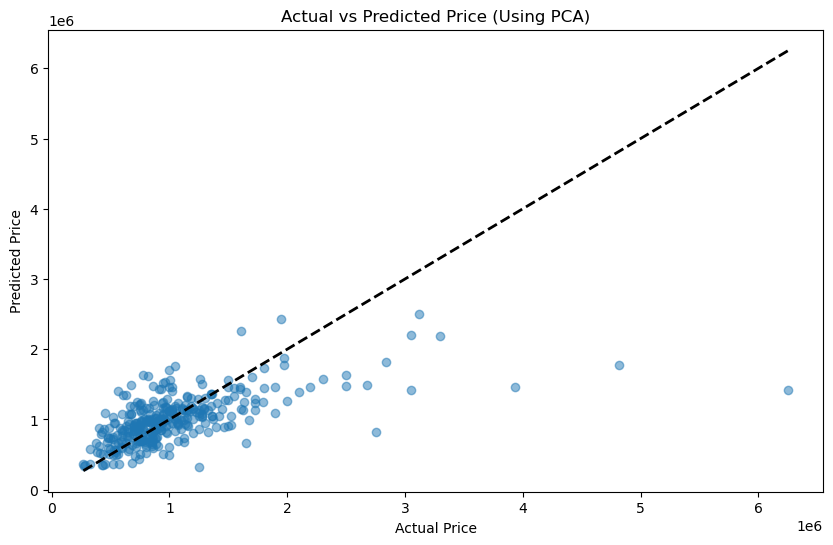

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming df_new_train is your dataframe after outlier removal
features = ['size', 'beds', 'baths']
X = df_new_train[features]
y = df_new_train['price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features and applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Linear Regression
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_pca, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price (Using PCA)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


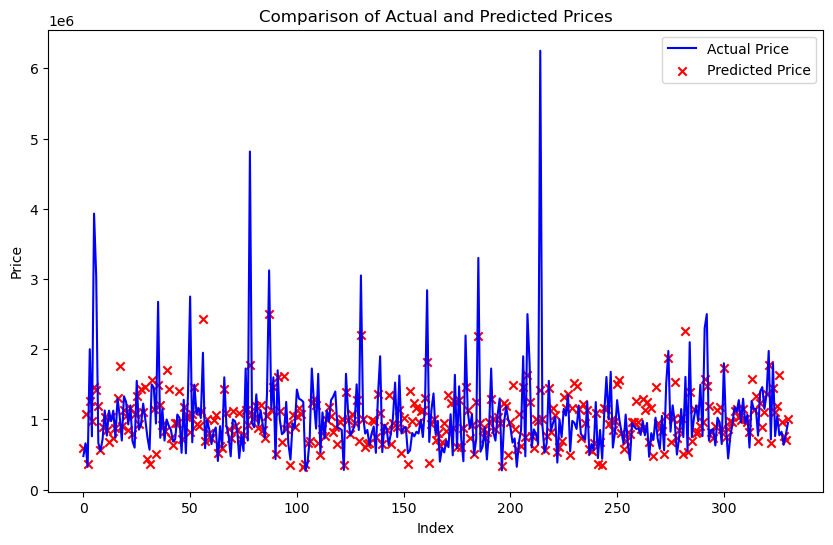

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test contains the actual prices and y_pred contains the predicted prices from the GLM
plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), 'b-', label='Actual Price')  # Blue line for actual prices
plt.scatter(np.arange(len(y_pred)), y_pred, color='r', marker='x', label='Predicted Price')  # Red crosses for predictions
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Comparison of Actual and Predicted Prices')
plt.legend()
plt.show()
